# CS512 - Homework 1
**Due Date:** Monday, October 28th, 08.00

## Submission Guidelines:
- Please ensure that your notebook is complete with all outputs displayed. This is important, so verify that none of the outputs are missing before submission.
- Save your notebook file using the following format: **CS512_Homework1_FirstName_LastName.ipynb** For example: *CS512_Homework1_Mert_Pekey.ipynb*

## Objective:
The goal of this homework is to help you gain hands-on experience with two fundamental classification techniques, **k-Nearest Neighbors (kNN)** and **Decision Trees**, while introducing performance evaluation metrics. You will train both classifiers on a dataset, evaluate their performance using a **Confusion Matrix**, plot the **ROC Curve**, and explore how **hyperparameters** impact the performance of these classifiers. Additionally, you will generate some **visualizations** to better understand the data and the models.

## Dataset:
For this homework, you will use the Breast Cancer Wisconsin (Diagnostic) Dataset, a well-known dataset from scikit-learn that is commonly used for binary classification tasks. This dataset contains features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing the characteristics of the cell nuclei present in the image. The goal is to classify whether the breast cancer is malignant (cancerous) or benign (non-cancerous).

### Instructions:

1. **Load the Dataset**:
    - Load the Dataset: Use sklearn.datasets.load_breast_cancer() to import the dataset.
    - Split the data into a training set (70%), validation set (15%), and test set (15%).
    - Print the data sizes.
2. **Exploratory Data Analysis (EDA) on Training Data:**
    - Class Distribution: Visualize the class distribution using a bar plot.
    - Feature Analysis: For the first 5 features:
        - Plot pairwise relationships using a scatter plot matrix or pairplot, coloring points by class.
        - Plot the correlation matrix for these features.
    - Summary Statistics: Display basic statistics (mean, standard deviation) for the first 5 features, grouped by class (malignant vs. benign).
3. **Preprocessing:**
    - Standardize the feature values (using StandardScaler or similar) before training the model.


Training set size: 398
Validation set size: 85
Test set size: 86


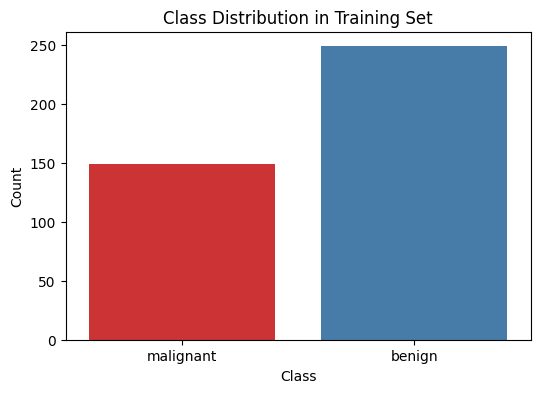

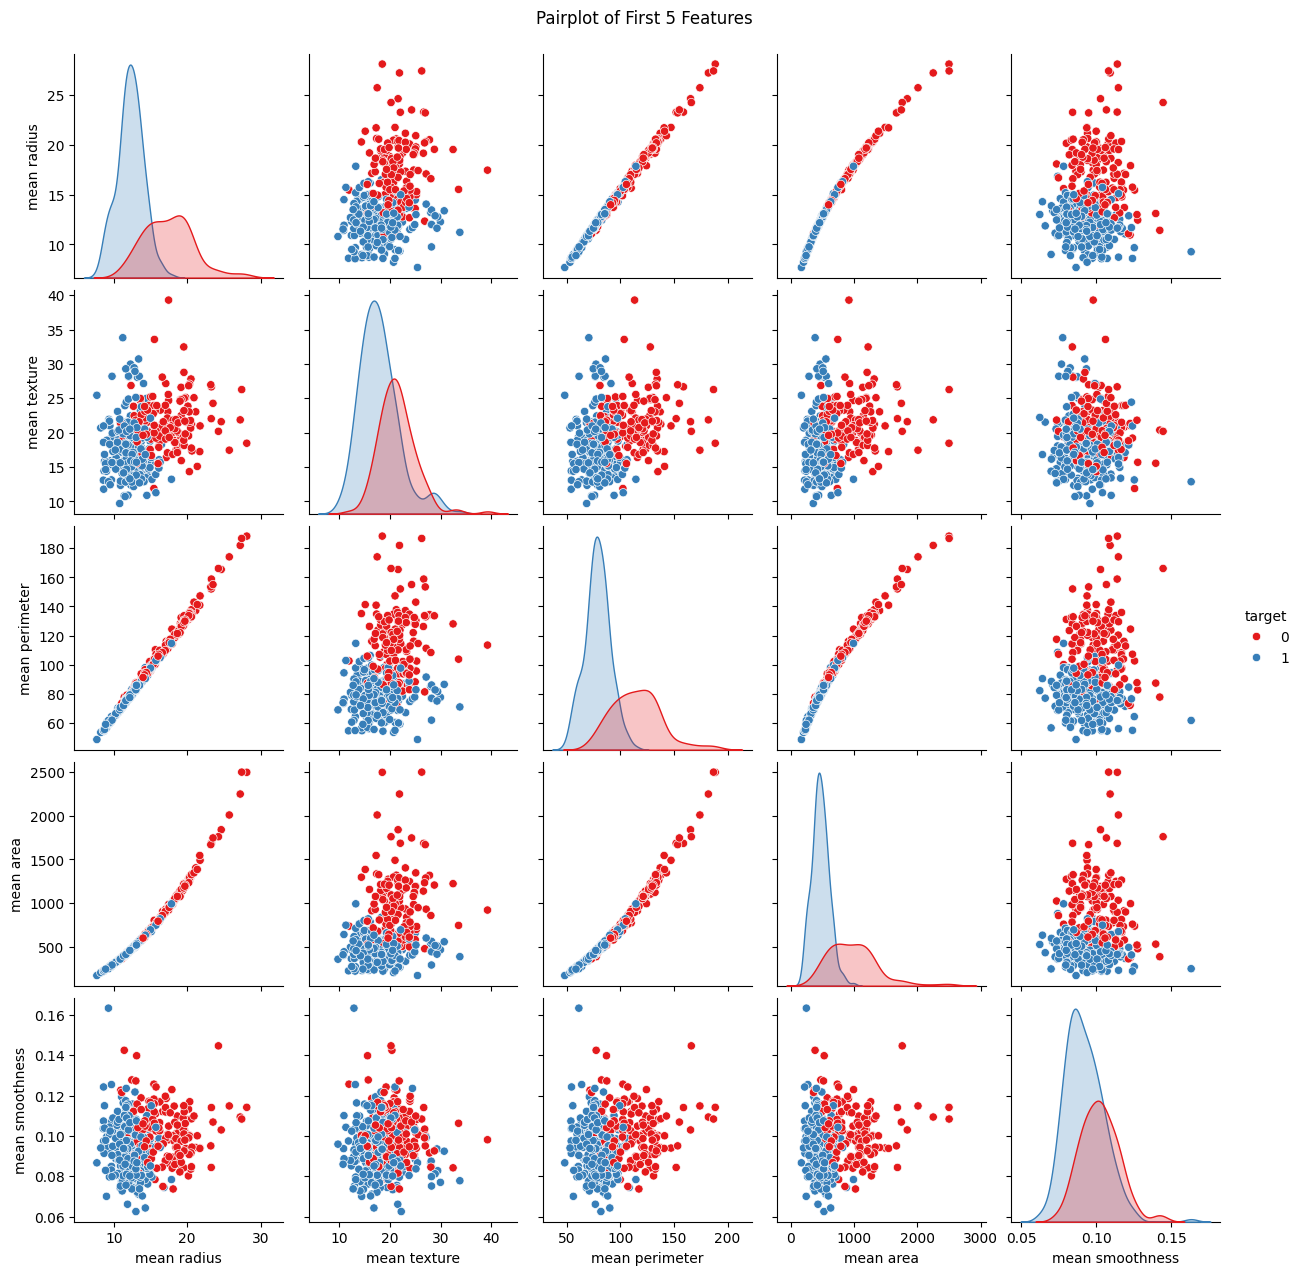

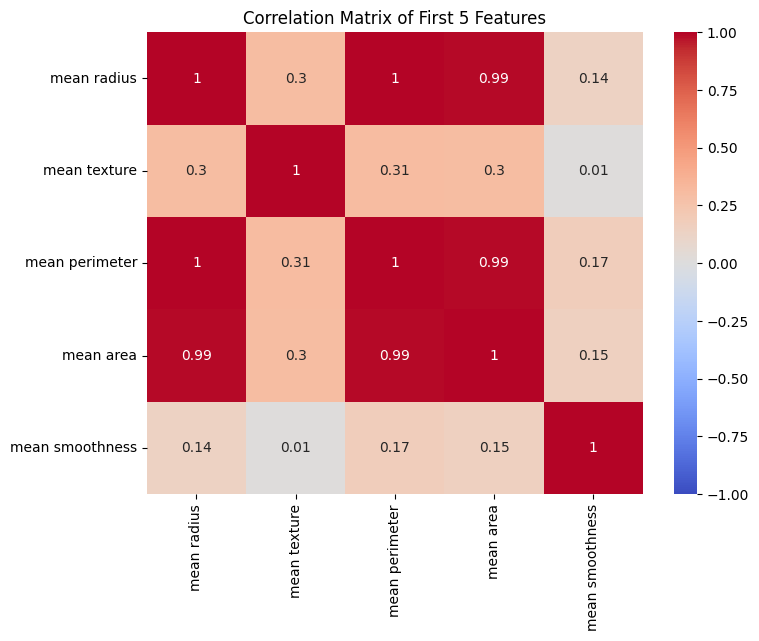

       mean radius           mean texture           mean perimeter             \
              mean       std         mean       std           mean        std   
target                                                                          
0        17.430604  3.347324    21.368792  3.675687     115.044765  22.714357   
1        12.228590  1.775947    17.836948  3.959325      78.619880  11.740349   

         mean area             mean smoothness            
              mean         std            mean       std  
target                                                    
0       978.583221  388.594533        0.102310  0.012789  
1       468.995582  135.771438        0.092163  0.012925  
Training set size (scaled): 398
Validation set size (scaled): 85
Test set size (scaled): 86


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training (70%), validation (15%), and test sets (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the data sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Convert to DataFrame for easier manipulation
df_train = pd.DataFrame(X_train, columns=data.feature_names)
df_train['target'] = y_train

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train, hue='target', palette='Set1', legend=False)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=data.target_names)
plt.show()

# Feature Analysis for the first 5 features
features = data.feature_names[:5]

# Pairplot without legend
pairplot = sns.pairplot(df_train, vars=features, hue='target', palette='Set1')
plt.suptitle('Pairplot of First 5 Features', y=1.02)
plt.show()

# Correlation Matrix
corr_matrix = df_train[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of First 5 Features')
plt.show()

# Summary Statistics
summary_stats = df_train.groupby('target')[features].agg(['mean', 'std'])
print(summary_stats)

# Step 1: Create a StandardScaler instance
scaler = StandardScaler()

# Step 2: Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Use the same scaler to transform the validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the scaled data sizes to ensure transformation was applied (no change in the dimesnsions)
print(f'Training set size (scaled): {X_train_scaled.shape[0]}')
print(f'Validation set size (scaled): {X_val_scaled.shape[0]}')
print(f'Test set size (scaled): {X_test_scaled.shape[0]}')


In [2]:
# Check that the scaled data has mean ~0 and std ~1
print("Mean of scaled training set (should be close to 0):", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training set (should be close to 1):", X_train_scaled.std(axis=0))

Mean of scaled training set (should be close to 0): [-1.20869255e-15 -3.93292322e-15 -3.50361839e-15  2.23160407e-16
 -2.97863353e-15  9.79674187e-16  5.20521649e-16  2.25949912e-16
 -1.35005072e-15  3.02103401e-16  5.08247827e-16 -3.65425166e-16
 -1.17996065e-16 -6.12575317e-16 -1.19056077e-15 -2.49270175e-15
 -3.00429698e-16  1.11663889e-15 -3.51756591e-16 -1.23017174e-16
  6.05880505e-16  3.82162197e-16 -1.60396543e-15 -1.79644128e-15
 -2.81461063e-16 -1.61233394e-16 -4.34604893e-16  7.29455580e-16
  1.52753299e-15 -3.03609734e-15]
Standard deviation of scaled training set (should be close to 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


4. **Train Classifiers:**
    - Train a k-Nearest Neighbors (kNN) classifier using Scikit-Learn.
    - Train a Decision Tree classifier using Scikit-Learn.
    - Use the default parameters for both classifiers initially.
    - Evaluate both classifiers on the validation set using:
        - Accuracy as a baseline metric.
        - Confusion Matrix and Classification Report (precision, recall, F1-score) to analyze performance.
    - **Hyperparameter Tuning:** Experiment by tuning the hyperparameters and compare the results on the **validation set**.
        - Tune n_neighbors from 1 to 20 for kNN
        - Tune max_depth for 1 to 10 for Decision Tree
        - Plot accuracy vs. hyperparameters:
            - For kNN, plot accuracy vs. n_neighbors.
            - For Decision Tree, plot accuracy vs. max_depth.
    - **Feature Importance:** For the Decision Tree, visualize the feature importance on the validation set using a bar plot.

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Step 1: Train a k-Nearest Neighbors (kNN) classifier
knn = KNeighborsClassifier()  # Using default parameters
knn.fit(X_train_scaled, y_train)

# Step 2: Train a Decision Tree classifier
dt = DecisionTreeClassifier()  # Using default parameters
dt.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the validation set
knn_val_predictions = knn.predict(X_val_scaled)
dt_val_predictions = dt.predict(X_val_scaled)

# Step 4: Evaluate the classifiers using accuracy on the validation set
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
dt_val_accuracy = accuracy_score(y_val, dt_val_predictions)

# Print the validation accuracy for both models
print(f'kNN Validation Accuracy: {knn_val_accuracy * 100:.2f}%')
print(f'Decision Tree Validation Accuracy: {dt_val_accuracy * 100:.2f}%')

# Step 5: Confusion Matrix and Classification Report for kNN
print("\n--- kNN Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_val, knn_val_predictions))
print("Classification Report:\n", classification_report(y_val, knn_val_predictions, target_names=data.target_names))

# Step 6: Confusion Matrix and Classification Report for Decision Tree
print("\n--- Decision Tree Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_val, dt_val_predictions))
print("Classification Report:\n", classification_report(y_val, dt_val_predictions, target_names=data.target_names))


kNN Validation Accuracy: 92.94%
Decision Tree Validation Accuracy: 94.12%

--- kNN Classifier ---
Confusion Matrix:
 [[34  3]
 [ 3 45]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        37
      benign       0.94      0.94      0.94        48

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85


--- Decision Tree Classifier ---
Confusion Matrix:
 [[36  1]
 [ 4 44]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.90      0.97      0.94        37
      benign       0.98      0.92      0.95        48

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



**Hyperparameter Tuning:**

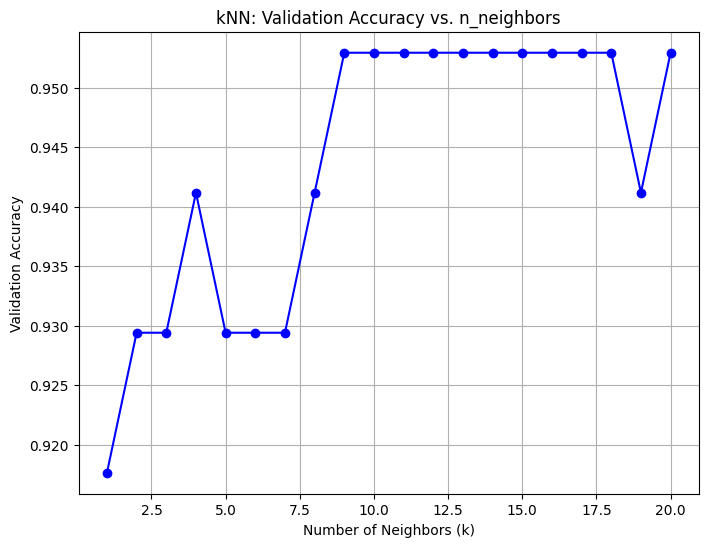

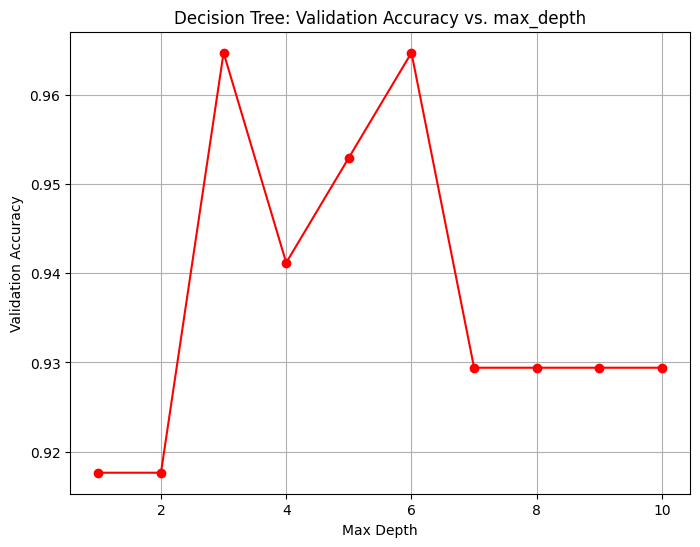

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Tune n_neighbors for kNN
k_range = range(1, 21)
knn_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_val_predictions = knn.predict(X_val_scaled)
    knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
    knn_accuracies.append(knn_val_accuracy)

# Plot accuracy vs. n_neighbors for kNN
plt.figure(figsize=(8, 6))
plt.plot(k_range, knn_accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN: Validation Accuracy vs. n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Step 2: Tune max_depth for Decision Tree
depth_range = range(1, 11)
dt_accuracies = []

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_scaled, y_train)
    dt_val_predictions = dt.predict(X_val_scaled)
    dt_val_accuracy = accuracy_score(y_val, dt_val_predictions)
    dt_accuracies.append(dt_val_accuracy)

# Plot accuracy vs. max_depth for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(depth_range, dt_accuracies, marker='o', linestyle='-', color='r')
plt.title('Decision Tree: Validation Accuracy vs. max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()


**Feature Importance**

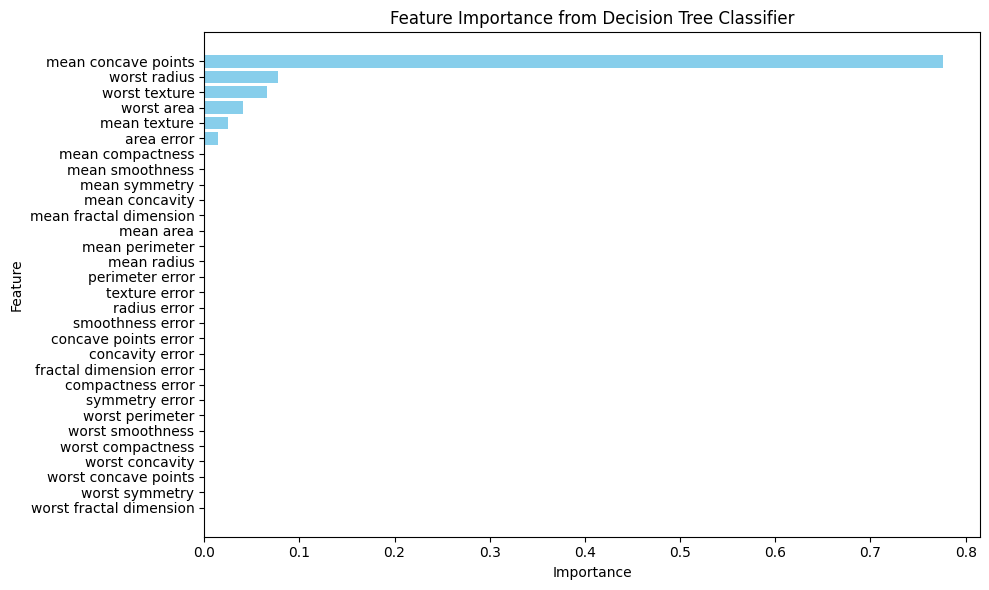

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Step 1: Train a Decision Tree classifier with the best max_depth (tuned from previous step)
best_depth = 3  # Assuming from the previous hyperparameter tuning results
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train_scaled, y_train)

# Step 2: Get feature importances
feature_importances = dt.feature_importances_

# Step 3: Create a DataFrame for easier plotting
features = data.feature_names
feat_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance for better visualization
feat_importances_df = feat_importances_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_importances_df['Feature'], feat_importances_df['Importance'], color='skyblue')
plt.title('Feature Importance from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()


5. **Evaluate on Test Data:**

    - After choosing the best models from the validation set, evaluate the performance on the test set.
    - Compute the following metrics for both models:
        - Accuracy
        - Precision
        - Recall
        - F1-score
        - Confusion Matrix
        - AUC Score
        - Plot the ROC curve for the positive class (malignant).


6. **Analysis**:
    - Answer the followings briefly:
        - Compare the performance of the two classifiers based on the metrics computed (both with default and tuned hyperparameters).
        - Discuss how changing hyperparameters (k for kNN and max_depth for Decision Tree) affected the performance.
        - Summarize which classifier performed better overall and why.
